In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [3]:
diver_dataset = h5py.File('MSSM_diver/samples/MSSM_diver.hdf5', 'r')['MSSM']
rand_dataset = h5py.File('MSSM_random/samples/MSSM_random.hdf5', 'r')['MSSM']

diver = {}
rand = {}

for key in diver_dataset.keys():
    diver[key] = diver_dataset[key][:]

for key in rand_dataset.keys():
    rand[key] = rand_dataset[key][:]

diver = pd.DataFrame(data=diver)
rand = pd.DataFrame(data=rand)

diver = diver[diver['LogLike_isvalid'] == 1]
rand = rand[rand['LogLike_isvalid'] == 1]


In [12]:
len(diver['#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3'])

658

In [4]:
with open("keys.txt", 'w') as file:
    for key in diver_dataset.keys():
        file.write(key + "\n")

file.close()
        

In [5]:
m_h0 = "#MSSM_spectrum @SpecBit::get_MSSM_spectrum_as_map::h0_1 Pole_Mass"
lnL_h0_mass = "#lnL_h_mass @PrecisionBit::lnL_h_mass"

In [6]:
prof_like_ratio_diver = np.exp(diver['LogLike'] - diver['LogLike'].max())
prof_like_ratio_rand = np.exp(rand['LogLike'] - rand['LogLike'].max())

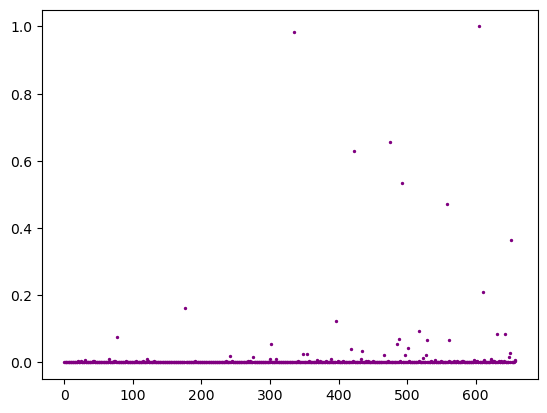

In [7]:
plt.scatter(x=np.linspace(0, len(diver['LogLike']), len(diver['LogLike'])), y=prof_like_ratio_diver, s=2, c='purple')

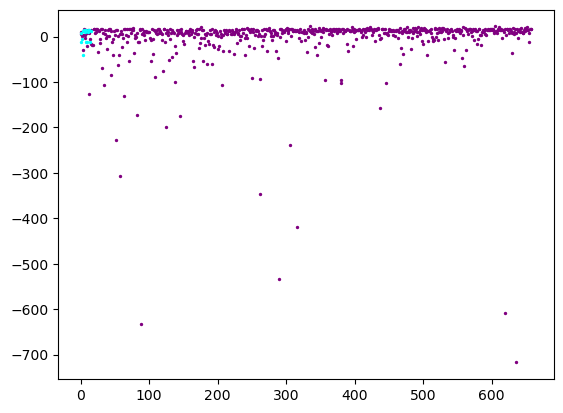

In [8]:
plt.scatter(x=np.linspace(0, len(diver['LogLike']), len(diver['LogLike'])), y=diver['LogLike'], s=2, c='purple')
plt.scatter(x=np.linspace(0, len(rand['LogLike']), len(rand['LogLike'])), y=rand['LogLike'], s=2, c='cyan')


In [9]:
diver['LogLike']

1       11.133599
23       6.412686
27       1.516781
38       4.111448
72     -29.540790
          ...    
2294     7.352669
2295   -12.697786
2297    15.832119
2300    17.315986
2301    16.810911
Name: LogLike, Length: 658, dtype: float64

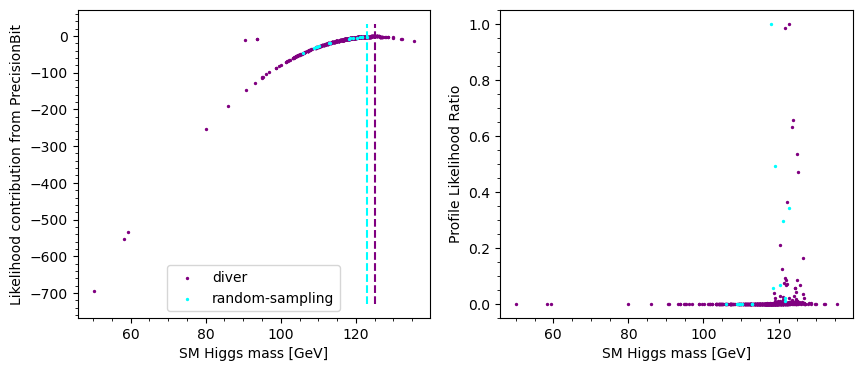

In [10]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)

ax.scatter(x=diver[m_h0], y=diver[lnL_h0_mass], c='purple', s=2, label="diver")
ax.scatter(x=rand[m_h0], y=rand[lnL_h0_mass], c='cyan', s=2, label="random-sampling")
ax.vlines([diver[m_h0][diver[lnL_h0_mass].idxmax()], rand[m_h0][rand[lnL_h0_mass].idxmax()]], ax.get_ylim()[0], ax.get_ylim()[1], colors=['purple', 'cyan'], linestyles='--')

ax.legend(loc='lower center')
ax.set_xlabel("SM Higgs mass [GeV]")
ax.set_ylabel("Likelihood contribution from PrecisionBit")
ax.minorticks_on()

ax2 = fig.add_subplot(122)
ax2.scatter(x=diver[m_h0], y=prof_like_ratio_diver, c='purple', s=2)
ax2.scatter(x=rand[m_h0], y=prof_like_ratio_rand, c='cyan', s=2)

ax2.set_xlabel("SM Higgs mass [GeV]")
ax2.set_ylabel("Profile Likelihood Ratio")
ax2.minorticks_on()
